# 2d convolution, for gray images

In [ ]:
from PIL import Image
import numpy as np

def load_local_image_as_grayscale_matrix(path):
    # Open image file
    img = Image.open(path)

    # convert to grayscale
    img_gray = img.convert("L")

    # extract pixels into 2D list
    width, height = img_gray.size
    pixels = img_gray.load()

    matrix = []
    for y in range(height):
        row = []
        for x in range(width):
            row.append(pixels[x, y])  # 0–255
        matrix.append(row)

    return img_gray, matrix


# load one image
path = "penguin.webp"   
img, image_matrix = load_local_image_as_grayscale_matrix(path)

image_matrix = np.array(image_matrix)

print(len(image_matrix), len(image_matrix[0]))  # height, width



450 600


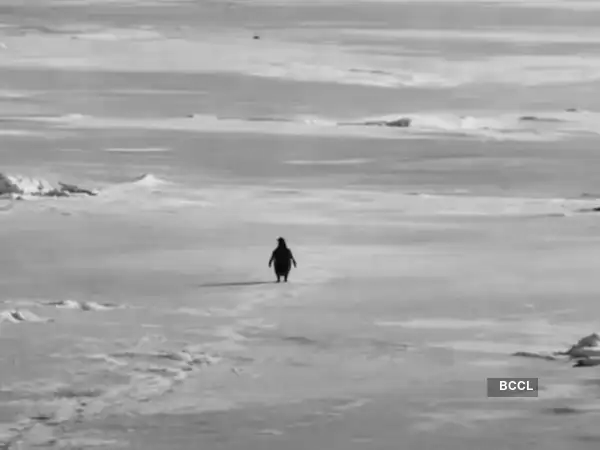

In [33]:
img 

In [58]:
def conv2d(image_matrix, kernel, stride=1, padding=0):
    # load into np arrays
    image = np.array(image_matrix, dtype=np.float32)
    kernel = np.array(kernel, dtype=np.float32)

    kH, kW = kernel.shape

    #pad image
    if padding > 0:
        image = np.pad(image, pad_width=padding, mode="constant", constant_values=0)

    # dimensions after padding
    H_p, W_p = image.shape

    # output size
    out_h = (H_p - kH) // stride + 1
    out_w = (W_p - kW) // stride + 1

    output = np.zeros((out_h, out_w), dtype=np.float32)

    # sliding window convolution
    for i in range(out_h):
        for j in range(out_w):
            row_start = i * stride
            col_start = j * stride

            window = image[row_start:row_start+kH, col_start:col_start+kW]
            output[i, j] = np.sum(window * kernel)

    return output


In [59]:
kernel = [[-1, 0], [0, 1]]
stride = 1
padding = 0

result = conv2d(image_matrix, kernel)

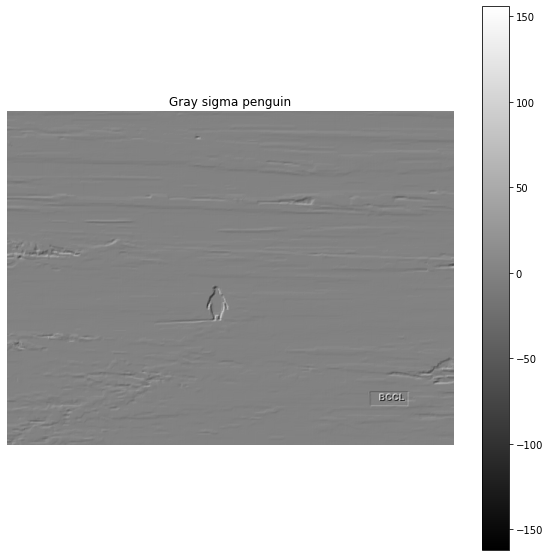

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10)) 
plt.imshow(result, cmap="gray")
plt.colorbar()          
plt.title("Gray sigma penguin")
plt.axis("off")
plt.show()


# 3d convolution for image with colors

In [70]:
from PIL import Image
import numpy as np

def load_local_image_as_rgb_array(path):
    img = Image.open(path).convert("RGB")   # ensure 3 channels
    image_np = np.array(img, dtype=np.float32) / 255.0
    return img, image_np


img, image_rgb_matrix = load_local_image_as_rgb_array("penguin.webp")
print(image_rgb_matrix.shape)   # (height, width, 3)


(450, 600, 3)


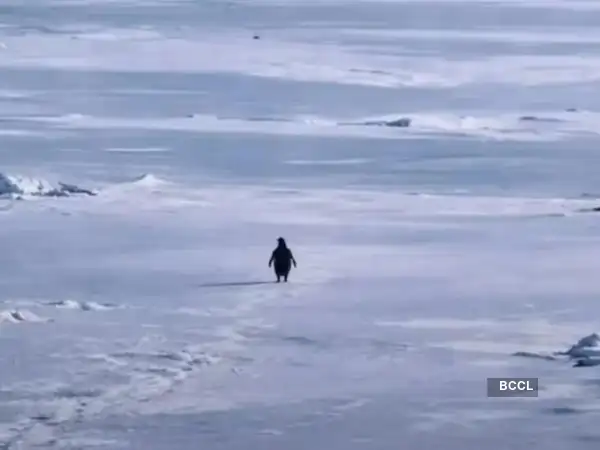

In [64]:
img

In [ ]:
def conv3d(image_matrix, kernel, stride=1, padding=0):
    import numpy as np

    # load into numpy arrays
    image = np.array(image_matrix, dtype=np.float32)
    kernel = np.array(kernel, dtype=np.float32)

    # shapes
    kH, kW, kC = kernel.shape
    H, W, C = image.shape

    # pad image 
    if padding > 0:
        image = np.pad(
            image,
            pad_width=((padding, padding), (padding, padding), (0, 0)),
            mode="constant",
            constant_values=0
        )

    H_p, W_p, _ = image.shape

    # output size
    out_h = (H_p - kH) // stride + 1
    out_w = (W_p - kW) // stride + 1

    # output feature map (2D)
    output = np.zeros((out_h, out_w), dtype=np.float32)

    # convolution
    for i in range(out_h):
        for j in range(out_w):
            row_start = i * stride
            col_start = j * stride

            window = image[
                row_start:row_start + kH,
                col_start:col_start + kW,
                :
            ]

            output[i, j] = np.sum(window * kernel)

    return output


In [95]:
kernel = np.array([
    [[-1, 1, -1], [ 0,  0,  0]],
    [[ 0,  0,  0],  [ 1,  1,  1]]
])
stride = 1
padding = 0

result = conv3d(image_rgb_matrix, kernel)


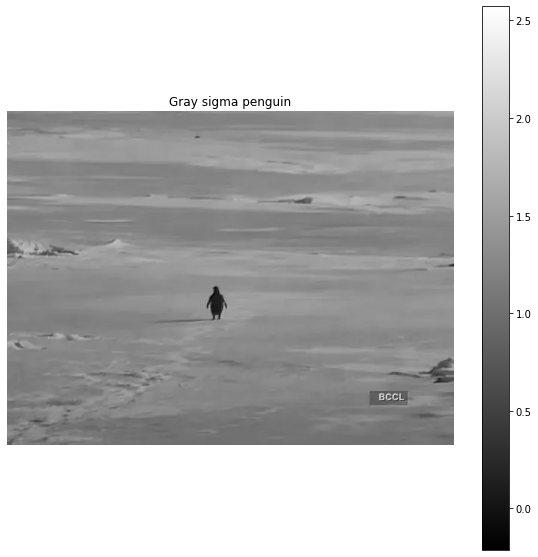

In [100]:
plt.figure(figsize=(10, 10)) 
plt.imshow(result, cmap="gray")
plt.colorbar()          
plt.title("Gray sigma penguin")
plt.axis("off")
plt.show()